In [1]:
logisticRegre.fit(X_train, y_train)#import the neccesary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#loading data file
fullFileName= "/Users/WanYi/Desktop/0809/實驗數據/Lisa_Video2_Surfing1.csv"
balance_data=pd.read_csv(fullFileName,sep=',',header=0)

In [2]:
print("Dataset Length:: ", len(balance_data) )
print("Dataset Shape:: ", balance_data)

Dataset Length::  8475
Dataset Shape::        IMG_Diff    STD   EAR  MOUTH    Label
0     591310.0   1.98  0.26   1.28    Video
1     516537.0   2.24  0.26   1.14    Video
2     540672.0   1.91  0.26   1.41    Video
3     528451.0   3.55  0.26   0.67    Video
4     581999.0   2.98  0.23   1.28    Video
5     523678.0   2.29  0.17   1.47    Video
6     549958.0   2.14  0.18   1.00    Video
7     524015.0   1.59  0.18   0.00    Video
8     546614.0   1.50  0.16   0.33    Video
9     537524.0   2.09  0.17   0.33    Video
10    567020.0   2.85  0.15   0.67    Video
11    473832.0   1.69  0.14   1.00    Video
12    535038.0   1.65  0.13   0.67    Video
13    503965.0   1.30  0.16   0.33    Video
14    548252.0   1.58  0.17   0.80    Video
15    530866.0   1.89  0.17   0.80    Video
16    539316.0   1.90  0.15   0.33    Video
17    547100.0   4.96  0.16   2.00    Video
18    581340.0   5.71  0.16   5.33    Video
19    651701.0   5.93  0.14   6.38    Video
20    636382.0   4.49  0.22   7.33  

In [3]:
print("Dataset:: ")
balance_data.head()

Dataset:: 


,IMG_Diff,STD,EAR,MOUTH,Label
0,591310.0,1.98,0.26,1.28,Video
1,516537.0,2.24,0.26,1.14,Video
2,540672.0,1.91,0.26,1.41,Video
3,528451.0,3.55,0.26,0.67,Video
4,581999.0,2.98,0.23,1.28,Video


In [4]:
#Sepearating the Target variable
X = balance_data.values[:, 0:4] #column no.0~3 -->column 1~4
Y = balance_data.values[:,4] #column no.4 -->column 5
#Spliting DatasetI ntoTest and Train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 100)
#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=8, min_samples_leaf=6)
clf_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [5]:
from sklearn.linear_model import LogisticRegression

logisticRegre = LogisticRegression()

In [7]:
logisticRegre.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
print(logisticRegre.predict(X_test[0].reshape(1,-1)))

['Surfing']


In [13]:
logisticRegre.predict(X_test[0:10])

array(['Surfing', 'Surfing', 'Video', 'Video', 'Video', 'Surfing',
       'Video', 'Video', 'Video', 'Video'], dtype=object)

In [14]:
predictions = logisticRegre.predict(X_test)

In [16]:
score = logisticRegre.score(X_test, Y_test)
print(score)

0.6940621313409359


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [20]:
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[ 646  617]
 [ 161 1119]]


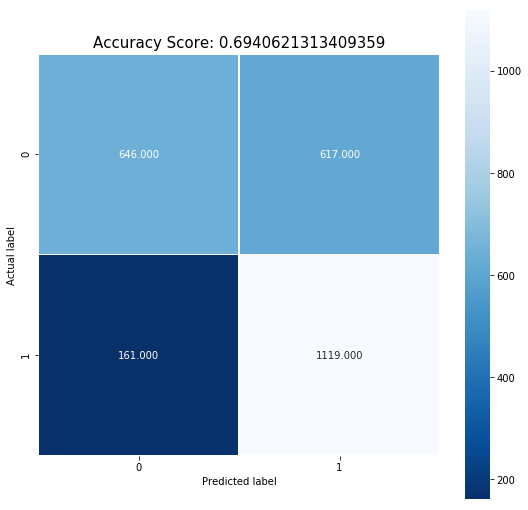

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt=".3f", linewidths= .5, square = True, cmap='Blues_r');       
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);